# Тензоры в PyTorch

[*Тензор*](https://pytorch.org/docs/stable/tensors.html) - специализированная структура данных наподобие матриц и массивов.

В *PyTorch* тензоры хранят входные и выходные данные моделей, а также их параметры (веса).

#### Установка PyTorch 2.0

Как понять какой PyTorch нужен?
https://pytorch.org/get-started/locally/

In [1]:
# PyTorch 2.x + платформа параллельных вычислений NVIDIA CUDA (11.8):
# ! pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu118

# # PyTorch 2.x + CUDA 12.4:
! pip3 install torch torchvision --pre --index-url https://download.pytorch.org/whl/nightly/cu124

Looking in indexes: https://download.pytorch.org/whl/nightly/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

#### Импортируем необходимые библиотеки

In [2]:
import numpy as np
import torch
print (torch.cuda.is_available())
torch.__version__

True


'2.6.0+cu124'

### 1. Инициализация тензоров

In [3]:
# Инициализация из структуры (напишите в чат, что это за структура):
my_data = [[1,2,3], [4,5,6], [7,8,9]]
print (my_data, '\n')

my_tensor = torch.tensor(my_data, device='cuda:0')
print (my_tensor)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]] 

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], device='cuda:0')


In [4]:
# Инициализация из NymPy array:
np_array = np.array(my_data)
print (np_array, '\n')

my_tensor = torch.from_numpy(np_array)
print (my_tensor)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [5]:
# перенос на другое устройство (вариант 1)
if torch.cuda.is_available():
    tensor_gpu = my_tensor.cuda()  # Переносим тензор на GPU
    print("Тензор на GPU:", tensor_gpu)
else:
    print("Found no NVIDIA driver on your system")

Тензор на GPU: tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], device='cuda:0')


In [6]:
# Инициализация из другого тензора:
my_ones = torch.ones_like(my_tensor) # свойства сохраняются
print(my_ones, '\n')

my_rand = torch.rand_like(my_tensor, dtype=torch.float) # переопределяем тип хранимых данных
print(my_rand)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]) 

tensor([[0.9292, 0.9286, 0.9671],
        [0.7810, 0.4197, 0.2444],
        [0.1424, 0.5716, 0.7235]])


In [7]:
# Инициализация с определением размерности тензора:
shape = (4,6,)
print (torch.rand(shape))
print (torch.ones(shape))
print (torch.zeros(shape))

tensor([[0.1079, 0.7088, 0.9294, 0.4571, 0.9355, 0.8818],
        [0.5424, 0.4053, 0.0429, 0.3074, 0.9383, 0.4774],
        [0.3672, 0.7774, 0.5423, 0.3465, 0.0732, 0.4514],
        [0.2426, 0.7264, 0.4174, 0.1774, 0.6644, 0.7252]])
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


### 2. Атрибуты тензоров

In [8]:
my_tensor = torch.rand(3,4,5,6)

print(f"Форма (размерность): {my_tensor.shape}")
print(f"Тип данных: {my_tensor.dtype}")
print(f"Девайс где хранятся данные: {my_tensor.device}")

Форма (размерность): torch.Size([3, 4, 5, 6])
Тип данных: torch.float32
Девайс где хранятся данные: cpu


### 3. Операции над тензорами
[Список операций в PyTorch](https://pytorch.org/docs/stable/torch.html)

In [9]:
# Перемещаем тензор на GPU:
my_tensor = torch.rand(size=(3,4))
if torch.cuda.is_available():
    my_tensor = my_tensor.to("cuda:0")
    print (my_tensor)
else: print('Found no NVIDIA driver on your system')

tensor([[0.1410, 0.9311, 0.5417, 0.4208],
        [0.3863, 0.5832, 0.1885, 0.6960],
        [0.1198, 0.3887, 0.6518, 0.0404]], device='cuda:0')


In [10]:
# my_tensor.cuda()

In [11]:
# Операции indexing и slicing:
print(f"Первая строка: {my_tensor[0]}")
print(f"Первый столбец: {my_tensor[:, 0]}")
print(f"Последний столбец: {my_tensor[..., -1]}")

my_tensor = my_tensor.to("cpu") # еще вариант переноса
my_tensor[:,1] = 0     # присваиваем константу 0 второму столбцу
print (my_tensor)

Первая строка: tensor([0.1410, 0.9311, 0.5417, 0.4208], device='cuda:0')
Первый столбец: tensor([0.1410, 0.3863, 0.1198], device='cuda:0')
Последний столбец: tensor([0.4208, 0.6960, 0.0404], device='cuda:0')
tensor([[0.1410, 0.0000, 0.5417, 0.4208],
        [0.3863, 0.0000, 0.1885, 0.6960],
        [0.1198, 0.0000, 0.6518, 0.0404]])


In [12]:
my_tensor.shape

torch.Size([3, 4])

In [13]:
# Конкатенация тензоров (объединение по существующему измерению):
cat_tensor = torch.cat([my_tensor, my_tensor, my_tensor], dim=0)
print(cat_tensor.shape)
print(cat_tensor)

# Стекинг тензоров (объединение в новом измерении):
stack_tensor = torch.stack([my_tensor, my_tensor, my_tensor])
print(stack_tensor.shape)
print(stack_tensor)

torch.Size([9, 4])
tensor([[0.1410, 0.0000, 0.5417, 0.4208],
        [0.3863, 0.0000, 0.1885, 0.6960],
        [0.1198, 0.0000, 0.6518, 0.0404],
        [0.1410, 0.0000, 0.5417, 0.4208],
        [0.3863, 0.0000, 0.1885, 0.6960],
        [0.1198, 0.0000, 0.6518, 0.0404],
        [0.1410, 0.0000, 0.5417, 0.4208],
        [0.3863, 0.0000, 0.1885, 0.6960],
        [0.1198, 0.0000, 0.6518, 0.0404]])
torch.Size([3, 3, 4])
tensor([[[0.1410, 0.0000, 0.5417, 0.4208],
         [0.3863, 0.0000, 0.1885, 0.6960],
         [0.1198, 0.0000, 0.6518, 0.0404]],

        [[0.1410, 0.0000, 0.5417, 0.4208],
         [0.3863, 0.0000, 0.1885, 0.6960],
         [0.1198, 0.0000, 0.6518, 0.0404]],

        [[0.1410, 0.0000, 0.5417, 0.4208],
         [0.3863, 0.0000, 0.1885, 0.6960],
         [0.1198, 0.0000, 0.6518, 0.0404]]])


In [14]:
# Арифметические операции - перемножение матриц:
y1 = my_tensor @ my_tensor.T
y2 = my_tensor.matmul(my_tensor.T)
y3 = torch.rand_like(my_tensor)
torch.matmul(my_tensor, my_tensor.T, out=y3)
print ('y1:', y1,'\ny2:', y2,'\ny3:',y3)

y1: tensor([[0.4904, 0.4494, 0.3870],
        [0.4494, 0.6692, 0.1973],
        [0.3870, 0.1973, 0.4409]]) 
y2: tensor([[0.4904, 0.4494, 0.3870],
        [0.4494, 0.6692, 0.1973],
        [0.3870, 0.1973, 0.4409]]) 
y3: tensor([[0.4904, 0.4494, 0.3870],
        [0.4494, 0.6692, 0.1973],
        [0.3870, 0.1973, 0.4409]])


<ipython-input-14-ef30bf4498d2>:5: UserWarning: An output with one or more elements was resized since it had shape [3, 4], which does not match the required output shape [3, 3]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /pytorch/aten/src/ATen/native/Resize.cpp:30.)
  torch.matmul(my_tensor, my_tensor.T, out=y3)


In [15]:
# Арифметические операции - поэлементное перемножение:
z1 = my_tensor * my_tensor
z2 = my_tensor.mul(my_tensor)
z3 = torch.rand_like(my_tensor)
torch.mul(my_tensor, my_tensor, out=z3)
print ('z1:', z1,'\nz2:', z2,'\nz3:',z3)

z1: tensor([[0.0199, 0.0000, 0.2935, 0.1770],
        [0.1492, 0.0000, 0.0355, 0.4844],
        [0.0143, 0.0000, 0.4249, 0.0016]]) 
z2: tensor([[0.0199, 0.0000, 0.2935, 0.1770],
        [0.1492, 0.0000, 0.0355, 0.4844],
        [0.0143, 0.0000, 0.4249, 0.0016]]) 
z3: tensor([[0.0199, 0.0000, 0.2935, 0.1770],
        [0.1492, 0.0000, 0.0355, 0.4844],
        [0.0143, 0.0000, 0.4249, 0.0016]])


In [16]:
# Одноэлементные тензоры (скаляр):
result = my_tensor.sum()         # суммируем все элементы тензора
value = result.item()            # приводим тензор к Python numerical value
print(value, type(value), result, type(result))

result = my_tensor.mean()        # среднее по всем элементам тензора
print(result.item())

result = my_tensor.mean(dim=1)   # среднее по 1 измерению
print(result)

3.1862635612487793 <class 'float'> tensor(3.1863) <class 'torch.Tensor'>
0.26552197337150574
tensor([0.2759, 0.3177, 0.2030])


### 4. PyTorch тензоры и NumPy массивы:

In [17]:
# Tensor -> NumPy array:
t = torch.ones(5, device='cpu')
n = t.numpy()

t[1] = -6
print(t, t.shape, t.dtype)
print(n, n.shape, n.dtype)

tensor([ 1., -6.,  1.,  1.,  1.]) torch.Size([5]) torch.float32
[ 1. -6.  1.  1.  1.] (5,) float32


In [18]:
# NumPy array -> Tensor:
n = np.ones(5)
t = torch.from_numpy(n)

t[1] = -6
n = np.add(n, 7, out=n)
print(t, t.shape, t.dtype)
print(n, n.shape, n.dtype)

tensor([8., 1., 8., 8., 8.], dtype=torch.float64) torch.Size([5]) torch.float64
[8. 1. 8. 8. 8.] (5,) float64


Самостоятельное задание:
ниже приведено два тензора. Необходимо взять квадратный корень поэлементно с каждого массива, затем поэлементно перемножить и найти стандартное отклонение

In [19]:
import torch
array1 = torch.tensor([1, 2, 3])
array2 = torch.tensor([[4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])

In [20]:
res= torch.mul(array1.to(torch.float).sqrt_(), array2.sqrt_()).std().item()
res

1.1629352569580078

## Аппроксимация функции y=sin(x) полиномом третьего порядка (NumPy vs PyTorch vs PyTorch NN)

In [21]:
import numpy as np
import math

# Создаем датасет (x - входные данные, y - результат):
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Инициализируем коэффициенты нашего полинома случайными значениями (выполняют роль весов модели):
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

# Скорость обучения:
learning_rate = 1e-6

# Оптимизационный цикл (цикл обучения):
for t in range(2500):

    # Прямой проход: вычисляем предсказанный y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Считаем ошибку (MSE) предскзанного y_pred и истинного y:
    loss = np.square(y_pred - y).mean()
    if t % 100 == 99:
        print(f'iter={t}, loss={loss}')

    # Обратный проход (вычисляем градиенты для a, b, c, d относительно loss):
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Обновляем коэффициенты полинома (веса) с учетом расчитанного градиента:
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

iter=99, loss=0.39777171768877256
iter=199, loss=0.27623738892732863
iter=299, loss=0.19244727513271478
iter=399, loss=0.13461696432739506
iter=499, loss=0.09466124753995943
iter=599, loss=0.06702660252152315
iter=699, loss=0.04789415240604657
iter=799, loss=0.034634915462773024
iter=899, loss=0.025437058801953183
iter=999, loss=0.019050552843810364
iter=1099, loss=0.014612049284792466
iter=1199, loss=0.011524641262681162
iter=1299, loss=0.00937521250455323
iter=1399, loss=0.007877560816052752
iter=1499, loss=0.006833214923757618
iter=1599, loss=0.006104411072052467
iter=1699, loss=0.005595435796196613
iter=1799, loss=0.005239731198164718
iter=1899, loss=0.004990973698914516
iter=1999, loss=0.004816895614806109
iter=2099, loss=0.0046950020635353395
iter=2199, loss=0.004609598927527322
iter=2299, loss=0.004549728635855112
iter=2399, loss=0.004507735171333775
iter=2499, loss=0.004478265625331504
Result: y = 0.011862940217502432 + 0.8531350062805678 x + -0.002046554587696451 x^2 + -0.0928

переходим на PyTorch

In [22]:
import torch
import math


# Выбираем устройства для вычислений:
# device = torch.device("cpu")
device = torch.device("cuda:0") # запускаем на GPU

# Создаем датасет (x - входные данные, y - результат):
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=torch.float32)
y = torch.sin(x)

# Инициализируем коэффициенты нашего полинома случайными значениями (выполняют роль весов модели):
a = torch.randn((), device=device, dtype=torch.float32)
b = torch.randn((), device=device, dtype=torch.float32)
c = torch.randn((), device=device, dtype=torch.float32)
d = torch.randn((), device=device, dtype=torch.float32)

# Скорость обучения:
learning_rate = 1e-6


# Оптимизационный цикл (цикл обучения):
for t in range(2500):

    # Прямой проход: вычисляем предсказанный y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Считаем ошибку (MSE) предскзанного y_pred и истинного y:
    loss = (y_pred - y).pow(2).mean().item()
    if t % 100 == 99:
        print(f'iter={t}, loss={loss}')

    # Обратный проход (вычисляем градиенты для a, b, c, d относительно loss):
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Обновляем коэффициенты полинома (веса) с учетом расчитанного градиента:
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

iter=99, loss=1.955390214920044
iter=199, loss=1.2952699661254883
iter=299, loss=0.8585395812988281
iter=399, loss=0.5695911049842834
iter=499, loss=0.3784104287624359
iter=599, loss=0.2519117593765259
iter=699, loss=0.16820770502090454
iter=799, loss=0.11281810700893402
iter=899, loss=0.07616336643695831
iter=999, loss=0.051905155181884766
iter=1099, loss=0.035850223153829575
iter=1199, loss=0.02522379718720913
iter=1299, loss=0.018189948052167892
iter=1399, loss=0.013533730059862137
iter=1499, loss=0.010451221838593483
iter=1599, loss=0.008410370908677578
iter=1699, loss=0.007059100084006786
iter=1799, loss=0.006164303049445152
iter=1899, loss=0.00557170994579792
iter=1999, loss=0.005179230123758316
iter=2099, loss=0.004919255152344704
iter=2199, loss=0.00474704010412097
iter=2299, loss=0.004632928874343634
iter=2399, loss=0.0045573171228170395
iter=2499, loss=0.004507202189415693
Result: y = -0.003050378058105707 + 0.8433792591094971 x + 0.0005262403865344822 x^2 + -0.09142981469631

PyTorch  + torch.nn + AutoGrad

In [23]:
import torch
import math

# Создаем датасет (x - входные данные, y - результат):
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Подготавливаем входной тензор (x, x^2, x^3) который будет поступать в сеть:
p = torch.tensor([1, 2, 3])     # степени полинома
xx = x.unsqueeze(-1).pow(p)     # возводим входной вектор x в степени p

# Определем модель из torch.nn котора состоит из одного линейного слоя с 1 нейронам
# каждый из трех нейронов моделирует собой один из коэффициентов полинома (а где же 4ый?)
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),      # линейный слой из одного нейрона и трех входов (весов)
    torch.nn.Flatten(0, 1)      # представляем результат в виде вектора
)

# Функция потерь MSE из torch.nn:
loss_fn = torch.nn.MSELoss(reduction='sum')

# Скорость обучения:
learning_rate = 1e-6

# Оптимизационный цикл (цикл обучения):
for t in range(2500):

    # Прямой проход: вычисляем предсказанный y пропуская вход xx через модель:
    y_pred = model(xx)

    # Считаем ошибку (MSE) предскзанного y_pred и истинного y:
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(f'iter={t}, loss={loss.item()}')    # !!! loss.item()

    # Перед обратным проходом нам нужно занулить накопленный в буфере градиент (для всех весов)
    model.zero_grad()

    # Обратный проход (вычисляем градиенты для весов модели относительно loss):
    loss.backward()

    # Обновляем веса модели используя градиентный спуск
    # каждый параметр модели  (вес) является тензором,
    # поэтому мы можем обратиться к его градиенту:
    with torch.no_grad(): # отключаем вычисление градиента
        for param in model.parameters():
            param -= learning_rate * param.grad


# Мы можем обратиться к первому слою нашей модели как к первому элементу list:
linear_layer = model[0]

# Печатаем значения весов этого слоя (это и будут обученный коэффициенты искомого полинома):
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

iter=99, loss=504.31256103515625
iter=199, loss=340.0874328613281
iter=299, loss=230.43429565429688
iter=399, loss=157.1763153076172
iter=499, loss=108.20382690429688
iter=599, loss=75.44536590576172
iter=699, loss=53.51811218261719
iter=799, loss=38.830810546875
iter=899, loss=28.985736846923828
iter=999, loss=22.381549835205078
iter=1099, loss=17.94791030883789
iter=1199, loss=14.968987464904785
iter=1299, loss=12.965827941894531
iter=1399, loss=11.617618560791016
iter=1499, loss=10.709385871887207
iter=1599, loss=10.09700870513916
iter=1699, loss=9.683717727661133
iter=1799, loss=9.404500007629395
iter=1899, loss=9.21568489074707
iter=1999, loss=9.087867736816406
iter=2099, loss=9.001246452331543
iter=2199, loss=8.942483901977539
iter=2299, loss=8.902578353881836
iter=2399, loss=8.875446319580078
iter=2499, loss=8.856975555419922
Result: y = 0.004664897453039885 + 0.8523517847061157 x + -0.0008047723094932735 x^2 + -0.09270608425140381 x^3


Flatten

In [24]:
# 4-мерный тензор:
input = torch.randn(32, 1, 5, 5)

# Параметры по умолчанию (0,1):
m = torch.nn.Flatten(0, 1)
output = m(input)
print(output.shape)        # преобразуем в вектор только первые два измерения

# Параметры (0,2):
m = torch.nn.Flatten(0, 2)
output = m(input)
print(output.shape)        # преобразуем в вектор 1,2 и 3 измерения, оставля 4ое

torch.Size([32, 5, 5])
torch.Size([160, 5])


PyTorch + torch.nn + AutoGrad + torch.optim

In [25]:
import torch
import math


# Выбираем устройства для вычислений:
device = torch.device("cpu")
# device = torch.device("cuda:0") # запускаем на GPU

# Создаем датасет (x - входные данные, y - результат):
x = torch.linspace(-math.pi, math.pi, 2000, device=device)
y = torch.sin(x)

# Подготавливаем входной тензор (x, x^2, x^3) который будет поступать в сеть:
p = torch.tensor([1, 2, 3])     # степени полинома
xx = x.unsqueeze(-1).pow(p)     # возводим входной вектор x в степени p

# Определем модель из torch.nn котора состоит из одного линейного слоя с 3 нейронами
# каждый из трех нейронов моделирует собой один из коэффициентов полинома (а где же 4ый?)
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),      # линейный слой из одного нейрона и трех входов (весов)
    torch.nn.Flatten(0, 1)      # представляем результат в виде вектора
)

# Функция потерь MSE из torch.nn:
loss_fn = torch.nn.MSELoss(reduction='sum')

# Скорость обучения:
learning_rate = 1e-3

# Будем использовать оптимайзер RMSprop из torch.optim:
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)


# Оптимизационный цикл (цикл обучения):
for t in range(2500):

    # Прямой проход: вычисляем предсказанный y пропуская вход xx через модель:
    y_pred = model(xx)

    # Считаем ошибку (MSE) предскзанного y_pred и истинного y:
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(f'iter={t}, loss={loss.item()}')    # !!! loss.item()

    # Перед обратным проходом нам нужно занулить градиент для всех весов которые обновляет optimizer
    optimizer.zero_grad()

    # Обратный проход (вычисляем градиенты для весов модели относительно loss):
    loss.backward()

    # Обновляем веса оптимайзером:
    optimizer.step()


# Мы можем обратиться к первому слою нашей модели как к первому элементу list:
linear_layer = model[0]

# Печатаем значения весов этого слоя (это и будут обученный коэффициенты искомого полинома):
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

iter=99, loss=28165.541015625
iter=199, loss=13600.197265625
iter=299, loss=6147.93994140625
iter=399, loss=2760.807373046875
iter=499, loss=1645.2083740234375
iter=599, loss=1376.6534423828125
iter=699, loss=1221.02099609375
iter=799, loss=1048.6444091796875
iter=899, loss=872.923828125
iter=999, loss=708.47705078125
iter=1099, loss=561.4848022460938
iter=1199, loss=433.55194091796875
iter=1299, loss=324.5233154296875
iter=1399, loss=233.73655700683594
iter=1499, loss=160.3769073486328
iter=1599, loss=103.51239776611328
iter=1699, loss=62.07889175415039
iter=1799, loss=34.46782302856445
iter=1899, loss=18.61723518371582
iter=1999, loss=11.353195190429688
iter=2099, loss=9.18745231628418
iter=2199, loss=8.899714469909668
iter=2299, loss=8.925982475280762
iter=2399, loss=8.929951667785645
iter=2499, loss=8.916090965270996
Result: y = -0.0004999889060854912 + 0.8571854829788208 x + -0.0004999777302145958 x^2 + -0.09283983707427979 x^3


фиксация весов при обучении (если необходимо)

In [26]:
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(3, 1),
    nn.Linear(1, 1)
)

# Замораживаем только первый слой
for param in model[0].parameters():
    param.requires_grad = False # True - разморозка

# Проверяем, какие параметры заморожены
for name, param in model.named_parameters():
    print(f"Параметр: {name}, requires_grad: {param.requires_grad}")

Параметр: 0.weight, requires_grad: False
Параметр: 0.bias, requires_grad: False
Параметр: 1.weight, requires_grad: True
Параметр: 1.bias, requires_grad: True


In [27]:
# Создаём оптимизатор только для обучаемых параметров
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01)

# Функция потерь
criterion = nn.MSELoss()

In [28]:
# Генерация случайных данных
X = torch.randn(100, 3)  # 100 примеров, 10 признаков
y = torch.randn(100, 1)   # 100 примеров, 1 целевая переменная

# Цикл обучения
for epoch in range(500):  # 50 эпох
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 99 == 0:
        print(f"Эпоха [{epoch + 1}/{epoch}], Loss: {loss.item():.4f}")

Эпоха [99/98], Loss: 0.9559
Эпоха [198/197], Loss: 0.9559
Эпоха [297/296], Loss: 0.9559
Эпоха [396/395], Loss: 0.9559
Эпоха [495/494], Loss: 0.9559


In [29]:
# Проверяем веса первого слоя (должны остаться неизменными)
print("Веса первого слоя (заморожены):", model[0].weight)

# Проверяем веса последнего слоя (должны обновиться)
print("Веса последнего слоя (разморожены):", model[1].weight)

Веса первого слоя (заморожены): Parameter containing:
tensor([[ 0.1621, -0.4203, -0.4273]])
Веса последнего слоя (разморожены): Parameter containing:
tensor([[-0.1926]], requires_grad=True)


DataLoader

In [30]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Преобразования для данных
transform = transforms.Compose([
    transforms.ToTensor(),  # Преобразует изображение в тензор
])

# Загрузка датасета MNIST
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Создание DataLoader
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Итерация по данным
for images, labels in dataloader:
    print(images.shape, labels.shape)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.92MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.88MB/s]


torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size([64, 1, 28, 28]) torch.Size([64])
torch.Size

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels: tensor([5, 9, 0, 3, 0, 0, 1, 3, 4, 2, 1, 2, 4, 6, 0, 4, 3, 5, 7, 3, 0, 5, 5, 1,
        7, 8, 7, 0, 2, 8, 0, 1, 7, 0, 4, 9, 9, 9, 0, 8, 4, 0, 1, 9, 1, 6, 3, 4,
        5, 7, 9, 4, 8, 6, 7, 7, 2, 8, 3, 9, 3, 6, 6, 7])


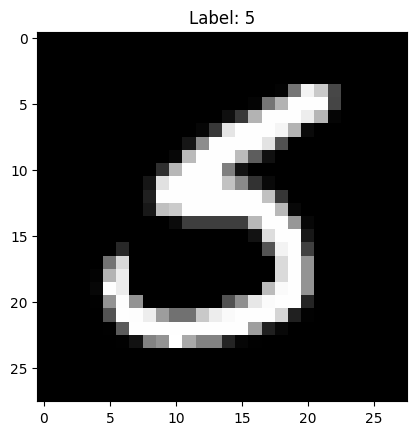

In [31]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Преобразования для данных (нормализация и преобразование в тензор)
transform = transforms.Compose([
    transforms.ToTensor(),  # Преобразует изображение в тензор
    transforms.Normalize((0.1307,), (0.3081,))  # Нормализация (среднее и std для MNIST)
])

# Создаем собственный Dataset для MNIST
class MNISTDataset(Dataset):
    def __init__(self, root, train=True, transform=None):
        # Загружаем данные MNIST
        self.data = datasets.MNIST(root=root, train=train, download=True, transform=transform)

    def __len__(self):
        # Возвращаем количество изображений
        return len(self.data)

    def __getitem__(self, idx):
        # Возвращаем изображение и метку
        image, label = self.data[idx]
        return image, label

# Создаем датасет
train_dataset = MNISTDataset(root='./data', train=True, transform=transform)
test_dataset = MNISTDataset(root='./data', train=False, transform=transform)

# Создаем DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # с перемешиванием
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Пример итерации (пробегаем по данным)
for images, labels in train_loader:
    print("Batch of images shape:", images.shape)  # [batch_size, channels, height, width]
    print("Batch of labels:", labels)  # Метки для текущего батча

    # Визуализация первого изображения в батче
    plt.imshow(images[0].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[0]}")
    plt.show()
    break  # Остановимся после первого батча для демонстрации